In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats
from sklearn.metrics import mean_squared_error
from math import sqrt
import os
from os import listdir
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from datetime import datetime
print("librerias ok")


from google.colab import drive
drive.mount('/content/drive')
print("Configuracion google ok")
%matplotlib inline

librerias ok
Mounted at /content/drive
Configuracion google ok


El trabajo final tiene como objetivo analizar datos de calidad del aire de las estaciones de monitoreo ubicadas en la Provincia de Buenos Aires.
Buenos Aires es la unica provincia que cuenta con este tipo de estaciones de referencia ya que son estaciones EPA. Existen otros sitios de monitero pero los mismos no son de referencia, sino que estan equipados con sensores llamados "low-cost", los cuales solo nos dan *"una idea"* de como es la calidad del aire en esos lugares.
El dataset fue descargado de la siguiente pagina web: http://jmb.acumar.gov.ar/calidad/historicos.php
Aqui se descargo un excel con todas las estaciones de monitero, pero para un analisis mas corto, se tomo una sola estacion llamada y un solo contaminante denominada *"EMCI_DS-PM25"* y se convirtio en .csv
Este archivo cuenta con infomracion sobre varios años de monitoreo en el sitio.

In [2]:
os. getcwd()

'/content'

In [3]:
# Analisis de datos de la estacion EMCI_DS-PM25.
# Leemos datos
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EMCI_DS-PM25.csv")
#data2 =  pd.read_csv("./EMCI_DS-PM25.csv")
# Visualizamos los primeros datos
print(f'Las columnas de este dataset son: {data.columns}')
print(" ---------------     Primeras filas del dataset         ------------------")
data.head()

Las columnas de este dataset son: Index(['date', 'hour', 'concentration_PM25', 'temperatura', 'humedad',
       'velocidad_viento', 'direccion_viento', 'presion', 'estacion', 'lat',
       'lon'],
      dtype='object')
 ---------------     Primeras filas del dataset         ------------------


,date,hour,concentration_PM25,temperatura,humedad,velocidad_viento,direccion_viento,presion,estacion,lat,lon
0,14/10/2015,00:00:00,10.48,17.6,72.0,20.9,45.0,1011.5,Estacion de Monitoreo Continuo Dock Sud,-34.667552,-58.329351
1,14/10/2015,01:00:00,12.33,17.6,72.0,22.5,45.0,1011.0,Estacion de Monitoreo Continuo Dock Sud,-34.667552,-58.329351
2,14/10/2015,02:00:00,4.48,17.4,73.0,22.5,45.0,1010.8,Estacion de Monitoreo Continuo Dock Sud,-34.667552,-58.329351
3,14/10/2015,03:00:00,4.21,16.6,72.0,24.1,45.0,1010.3,Estacion de Monitoreo Continuo Dock Sud,-34.667552,-58.329351
4,14/10/2015,05:00:00,2.91,16.1,80.0,25.7,45.0,1009.3,Estacion de Monitoreo Continuo Dock Sud,-34.667552,-58.329351


In [40]:
# Con sta funcion vemos el tipo de dato que corresponde a cada columna, asi como tambien podemos ver si posee datos nulos
data.info()
#Tipo de variables
print(data.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67451 entries, 0 to 67450
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                67451 non-null  object 
 1   hour                67451 non-null  object 
 2   concentration_PM25  53943 non-null  float64
 3   temperatura         67436 non-null  float64
 4   humedad             67436 non-null  float64
 5   velocidad_viento    67107 non-null  float64
 6   direccion_viento    66644 non-null  float64
 7   presion             67437 non-null  float64
 8   estacion            67451 non-null  object 
 9   lat                 67451 non-null  float64
 10  lon                 67451 non-null  float64
dtypes: float64(8), object(3)
memory usage: 5.7+ MB
date                   object
hour                   object
concentration_PM25    float64
temperatura           float64
humedad               float64
velocidad_viento      float64
direccion_viento      

Este set de datos cuenta con informacion sobre las concentraciones del material particulado (PM2.5)  en una estacion de monitoreo. Estas son partículas muy pequeñas suspendidas en el aire que tienen un diámetro de menos de 2.5 micras.
A continuacion se explican cada una de las variables:

*   Date: se trata de una variable date con el formato dd/mm/yy (por ej. 17/12/2018). Se trata de un dataset del periodo 2015-2021
*   Hour: debido a que las mediciones se realizan por hora, el dataset cuenta con este dato. por lo que para cada dia, deberian existir 24 valores. Esta en formato HH:MM:SS(20:00:00)
*   concentration_PM25: Muestra las concentraciones del contaminante en µg/m³. Esta es una variable numerica continua, con valores del tipo float.
*   Temperatura: hace referencia a la temperatura del sitio de monitoreo en °C. Esta es una variable numerica continua, con valores del tipo float.
*   humedad . Esta es una variable numerica continua, con valores del tipo float.
*   velocidad_viento: Corresponde a la velocidad del viento en km/h Esta es una variable numerica continua, con valores del tipo float.
*   direccion_viento: muestra la direccion del viento en grados. La misma pagina web de donde se extrayeron los datos menciona que los valores de dirección de viento corresponden a las siguientes direcciones:
22,5° - NNE; 45 °- NE; 67,5° - ENE; 90° - E; 112,5° - ESE; 135° - SE; 157,5° - SSE; 180° - S; 202,5° - SSO; 225° - SO; 247,5° - OSO; 270°- O; 292,5° - ONO; 315° - NO; 337,5° - NNO; 0° - N. Esta es una variable numerica continua, con valores del tipo float.

*   Estacion: Corresponde al nombre dela estacion en formato string. Siempre es el mismo valor, por lo que no deberiamos considerarlo como una variable. Esto seria de utilidad si consideramos datos de las estaciones de monitoreo restantes
*   Latitud y Longitud: Corresponde a las coordenadas de la ubicacion de la estacion en numerico (negativo). Siempre es el mismo valor, por lo que no deberiamos considerarlo como una variable. Esto seria de utilidad si consideramos datos de las estaciones de monitoreo restantes.






In [41]:
# Estadisticas de las variables numericas del dataset. Por ejemplo vemos que no se visualizan las columnas  date, hour y estacion
#porque
data.describe()

,concentration_PM25,temperatura,humedad,velocidad_viento,direccion_viento,presion,lat,lon
count,53943.000000,67436.000000,67436.000000,67107.000000,66644.000000,67437.000000,6.745100e+04,6.745100e+04
mean,13.678604,18.024064,75.769678,13.295896,134.040229,1013.959540,-3.466755e+01,-5.832935e+01
std,19.070407,5.845489,15.327845,6.551050,89.629836,6.387451,1.421096e-14,7.105480e-15
min,0.000000,1.300000,18.000000,0.000000,0.000000,989.300000,-3.466755e+01,-5.832935e+01
25%,5.120000,13.500000,67.000000,8.000000,67.500000,1009.500000,-3.466755e+01,-5.832935e+01
50%,9.470000,17.900000,79.000000,12.900000,112.500000,1013.700000,-3.466755e+01,-5.832935e+01
75%,16.540000,22.300000,87.000000,17.700000,202.500000,1018.200000,-3.466755e+01,-5.832935e+01
max,1359.810000,38.600000,100.000000,46.700000,337.500000,1036.400000,-3.466755e+01,-5.832935e+01


Con este metodo vemos las estadisticas basicas de las variables numericas

*   *concentration_PM25*: Vemos que existe alta variabilidad en las concentraciones de PM2.5. La cual tiene una media de 13.67 µg/m³y una desviacion estandar mayor a la media de 19.07. Ademas, podemos ver que el maximo es de 1359 µg/m³, y esta muy sobre la media, por lo que podemos concluir que se trata de outlier. A esto lo vamos a profundizar mas adeltante con boxplot. Podemos deducir que Ademasla distribución podría estar ligeramente sesgada hacia la derecha debido hacia estos valores. Aunque la concentracion de los valores este entre el cuartil 50 y 75.

*   *Temperatura*: las estadisticas muestran que existe una media de 18°C con una baja desviacion estandar de 5.84 que esta muy por debajo de la media.Nos da un indicio de una zona templada. Esto es esperable por las temperaturas que existen en la zona considerando la difeencias entre el verano (alta temperatura) e invierno (baja temperatura). El valor minimo es de ~1° y el maximo ~38° por lo que podemos ver que existe una amplitud termica. En cuanto a los cuartiles, vemos que estan ligeramente cercanos, que no hay diferencias significativas entre estos. La media se encuentra entre el cuartil 50 y 75, por lo que la distrubucion podria estar ligeramente sesgada hacia la derecha. En cuanto a los cuartiles, podriamos deducir que los valores estan sesgado hacia la derecha (valores mayores) ya que el primer cuartil cuenta con un rango mucho mas amplio que los otros dos. La media esta entre el primer - segundo cuartil

*   *Humedad*: podemos ver que en la zona es muy humeda porque tiene altos porcentajes de humedad, teniendo un minimo de 18% pero ha llegado a tener maximos de 100% de humedad. Ademas, la media es de 75% y una sd de 15 (valor muy por debajo de la media), lo que nos dice que es habitual en la zona la humedad. La SD nos muestra que la variabilidad de los valores es baja.
*   *Velocidad viento*: Tiene una media de 13km/h y una sd de 6.5. El valor minimo es igual a 0, es decir un dia sin viento, mientras que para el periodo del dataset el maximo alcanzo 46.7 km/h. Por lo que no es considerada una zona
ventosa. Los cuartiles presentan rangos bastante similares, donde la media se encuentra entre el cuartil 50 y 75. Se espera que no este sesgada esta variable. Sin embargo, podemos deducir que existen outliers debido a que el maximo es de 46.7 km/h


*   *Direccion del viento*: texto en cursiva es una variable que esta en grados segun lo mencionado anteriormente. Podemos deducir que en general el viento proviene del Sur-Este (media de 134).Pero debido a la desviacion estandar moderada, podriamos decir que es una zona que varia la direccion de donde proviene el viento. Tambien esto lo visualizamos en los cuartiles, ya que los rangos son amplios. Esta variable tiene un rango de valores que va desde 0(valor minimo) hacia 337,5 (NNO)
*   *Presion:* en esta zona vemos que el rango es pequeño ya que el valor minimo es igual a 989.3hPA y el valor maximo es 1036hPA, siendo la media igual a 1013 hPA. La desviacion estandar es muy pequeña, muy alejada de la media (6.4), lo que nos da una idea de que los valores estan super concentrados. Ademas, los cuartiles son todos muy cercanos y presentan los mismos rangos por lo que tambien podemos concluir que no existe outliers y no existe sesgo en estos valores.

*   En cuanto a las variables *lat*	y *lon*, corresponde a las coordenadas de la estacion, valores -34.66755224, -58.3293513







In [18]:

# el date y la hora estan en formato objeto, es un str. Eso no nos sirve lo tenemos que poner en formato date.
# Creamos una nueva columna "date_hour" con la fecha y hora en formato datetime
data["date_hour"] = data["date"] + " " + data["hour"] # unimos las dos columnas
data["date_hour"] =data["date_hour"].apply(lambda x: datetime.strptime(x,"%d/%m/%Y %H:%M:%S"))
data.info() # vemos que la nueva columna es un datetime
#Seteamos con index a la columna date_hour
data.set_index('date_hour', inplace = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67451 entries, 0 to 67450
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                67451 non-null  object        
 1   hour                67451 non-null  object        
 2   concentration_PM25  53943 non-null  float64       
 3   temperatura         67436 non-null  float64       
 4   humedad             67436 non-null  float64       
 5   velocidad_viento    67107 non-null  float64       
 6   direccion_viento    66644 non-null  float64       
 7   presion             67437 non-null  float64       
 8   precipitaciones     66996 non-null  float64       
 9   estacion            67451 non-null  object        
 10  lat                 67451 non-null  float64       
 11  lon                 67451 non-null  float64       
 12  date_hour           67451 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(9), object(3)
me

<ipython-input-22-5533f3d34225>:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  data_mean_period = data ['2015-10-01 00:00:00':'2021-12-31 23:59:59']


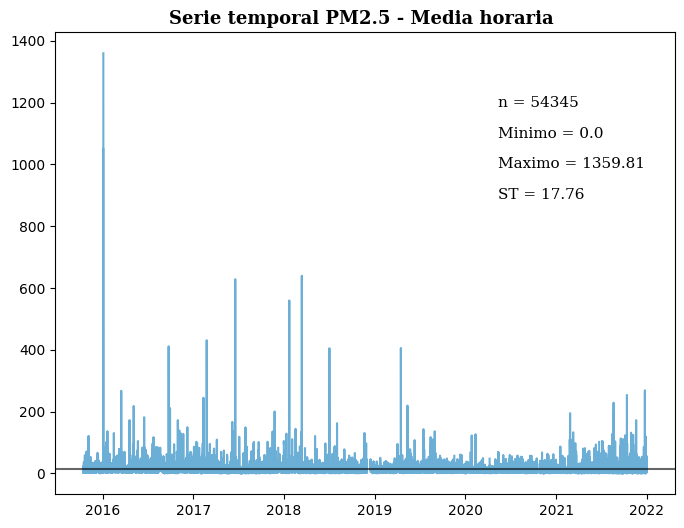

In [22]:
#print(data)
# Seteamos que nos muestre el periodo 2015-2023
data_mean_period = data ['2015-10-01 00:00:00':'2021-12-31 23:59:59']
# Estadisticas varias
media = data_mean_period['concentration_PM25'].mean()
sd = round(data_mean_period['concentration_PM25'].std(),2)
maximo = data_mean_period['concentration_PM25'].max()
minimo = data_mean_period['concentration_PM25'].min()
length = len(data_mean_period['concentration_PM25'])
#Generamos un plot con serie temporal de las concentraciones de PM2.5 con todos los datos
fig,axes=plt.subplots(1,1,figsize=(8,6))
# Plot
axes.plot(data_mean_period.index, data_mean_period.concentration_PM25,c="#6baed6",label="Mean")
#Texto
axes.text(data_mean_period.index[40000],1200, "n =" +" "+ str(length),ha="left", va="center",fontdict={'family': 'serif', 'color' : 'Black', 'size': 11})
axes.text(data_mean_period.index[40000],1100, "Minimo =" +" "+ str(minimo),ha="left", va="center",fontdict={'family': 'serif', 'color' : 'Black', 'size': 11})
axes.text(data_mean_period.index[40000],1000, "Maximo =" +" "+ str(maximo),ha="left", va="center",fontdict={'family': 'serif', 'color' : 'Black', 'size': 11})
axes.text(data_mean_period.index[40000],900, "ST =" +" "+ str(sd),ha="left", va="center",fontdict={'family': 'serif', 'color' : 'Black', 'size': 11})
# Linea de media horaria
axes.axhline(y=media, color= "black",linewidth=1.5, alpha=0.6, linestyle = '-')
#Titulo
axes.set_title("Serie temporal PM2.5 - Media horaria ",fontsize=13,fontdict={'family': 'serif', 'color' : 'Black', 'weight': 'bold', 'size': 16})

plt.show()

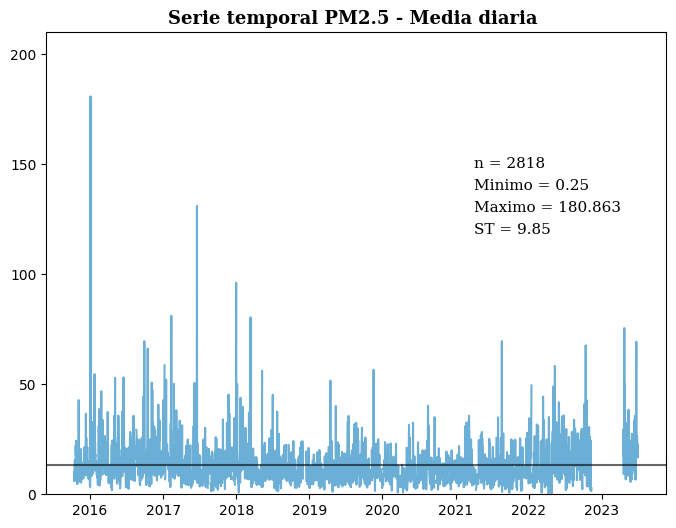

In [23]:
#Generamos una media diaria solo de pm2.5 y hacemos una serie temporal data_mean
data_mean  = data['concentration_PM25'].resample('1D').mean()
data_mean = data_mean ['2015-10-01':'2023-07-01']
media_dia = data_mean.mean()
sd_dia = round(data_mean.std(),2)
maximo_dia = data_mean.max()
minimo_dia = data_mean.min()
length_dia = len(data_mean)

fig,axes=plt.subplots(1,1,figsize=(8,6))
#plot
axes.plot(data_mean.index, data_mean,c="#6baed6",label="Mean")
#Texto estadisticas
axes.text(data_mean.index[2000],150, "n =" +" "+ str(length_dia),ha="left", va="center",fontdict={'family': 'serif', 'color' : 'Black', 'size': 11})
axes.text(data_mean.index[2000],140, "Minimo =" +" "+ str(minimo_dia),ha="left", va="center",fontdict={'family': 'serif', 'color' : 'Black', 'size': 11})
axes.text(data_mean.index[2000],130, "Maximo =" +" "+ str(maximo_dia),ha="left", va="center",fontdict={'family': 'serif', 'color' : 'Black', 'size': 11})
axes.text(data_mean.index[2000],120, "ST =" +" "+ str(sd_dia),ha="left", va="center",fontdict={'family': 'serif', 'color' : 'Black', 'size': 11})
# Linea de la media
axes.axhline(y=media_dia, color= "black",linewidth=1.5, alpha=0.6, linestyle = '-')
# Axis y ticks
#axes.yaxis.set_ticks(np.arange(0, 1400, 200)) # si usamos los mismos limites que los datos horarios
#axes.set_ylim(0, 1450)  # si usamos los mismos limites que los datos horarios
axes.yaxis.set_ticks(np.arange(0, 210, 50))
axes.set_ylim(0, 210)
#Titulo
axes.set_title("Serie temporal PM2.5 - Media diaria ",fontsize=13,fontdict={'family': 'serif', 'color' : 'Black', 'weight': 'bold', 'size': 16})

plt.show()

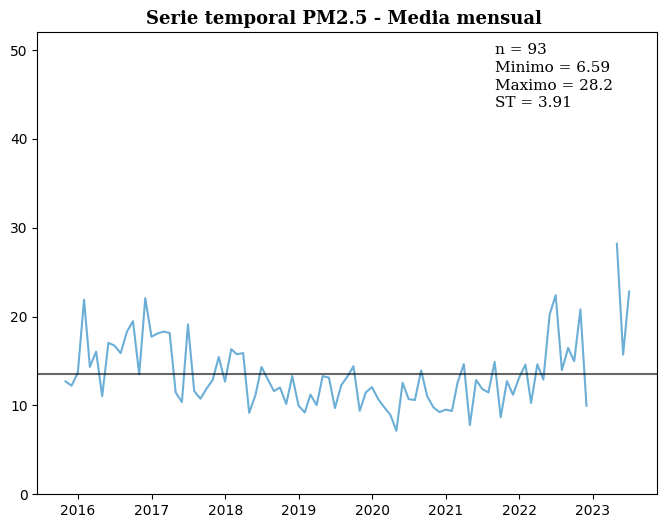

In [24]:
# Media mensual
#Generamos una media mensual solo de pm2.5 y hacemos una serie temporal data_mean
data_mean_month  = data['concentration_PM25'].resample('1M').mean()
data_mean_month = data_mean_month ['2015-10-01':'2023-07-01']
media_month = data_mean_month.mean()
sd_month = round(data_mean_month.std(),2)
maximo_month = round(data_mean_month.max(),2)
minimo_month =round( data_mean_month.min(),2)
length_month = len(data_mean_month)

fig,axes=plt.subplots(1,1,figsize=(8,6))
#plot
axes.plot(data_mean_month.index, data_mean_month,c="#6baed6",label="Mean")
#Texto estadisticas
axes.text(data_mean_month.index[70],50, "n =" +" "+ str(length_month),ha="left", va="center",fontdict={'family': 'serif', 'color' : 'Black', 'size': 11})
axes.text(data_mean_month.index[70],48, "Minimo =" +" "+ str(minimo_month),ha="left", va="center",fontdict={'family': 'serif', 'color' : 'Black', 'size': 11})
axes.text(data_mean_month.index[70],46, "Maximo =" +" "+ str(maximo_month),ha="left", va="center",fontdict={'family': 'serif', 'color' : 'Black', 'size': 11})
axes.text(data_mean_month.index[70],44, "ST =" +" "+ str(sd_month),ha="left", va="center",fontdict={'family': 'serif', 'color' : 'Black', 'size': 11})
# Linea de la media
axes.axhline(y=media_month, color= "black",linewidth=1.5, alpha=0.6, linestyle = '-')
# Axis y ticks
#axes.yaxis.set_ticks(np.arange(0, 1400, 200)) # si usamos los mismos limites que los datos horarios
#axes.set_ylim(0, 1450)  # si usamos los mismos limites que los datos horarios
axes.yaxis.set_ticks(np.arange(0, 52, 10))
axes.set_ylim(0, 52)
#Titulo
axes.set_title("Serie temporal PM2.5 - Media mensual ",fontsize=13,fontdict={'family': 'serif', 'color' : 'Black', 'weight': 'bold', 'size': 16})

plt.show()

En los plots anteriores vemos la variabilidad en el periodo de analisis. El primero corresponde a todos los valores (horarios), mientras que en el segundo son promedios diarios y el tercero media mensual. Vemos varios picos de concentraciones, el mas importante lo vemos a principio del año 2016, que corresponderia al valor maximo encontrado 1359.81 µg/m³. Esto representa un valor dañino para la salud de la poblacion. Tambien podriamos ver que durante el año 2020 se observaron los valor mas bajos. Esto coincide con el cierre por pandemia, ya  que luego en el 2021 comienzan a subir los valores nuevamente. Pero posiblemente en menores concentraciones que los años pre-pandemia

### 4- Detectar y arreglar los siguientes coceptos:
* Valores Ausente
* Valores Atipicos

#A. Valores ausentes

In [42]:
#Segun lo que vimos en la estadisticas anteriores, vemos que las precipitaciones posee un alto porcentaje de valores ausentes, lo cual vemos en mayor profundidad aca
# Mostramos cuantos valores hay en cada variable
valoresNull=data.isnull().sum()
print("----------    valores ausentes - nulos    ----------")
print(valoresNull)

valoresNull= round((data.isnull().sum()/len(data))*100,2)
print("----------    Porcentaje de valores ausentes - nulos por variable    ----------")
print(valoresNull)

----------    valores ausentes - nulos    ----------
date                      0
hour                      0
concentration_PM25    13508
temperatura              15
humedad                  15
velocidad_viento        344
direccion_viento        807
presion                  14
estacion                  0
lat                       0
lon                       0
dtype: int64
----------    Porcentaje de valores ausentes - nulos por variable    ----------
date                   0.00
hour                   0.00
concentration_PM25    20.03
temperatura            0.02
humedad                0.02
velocidad_viento       0.51
direccion_viento       1.20
presion                0.02
estacion               0.00
lat                    0.00
lon                    0.00
dtype: float64


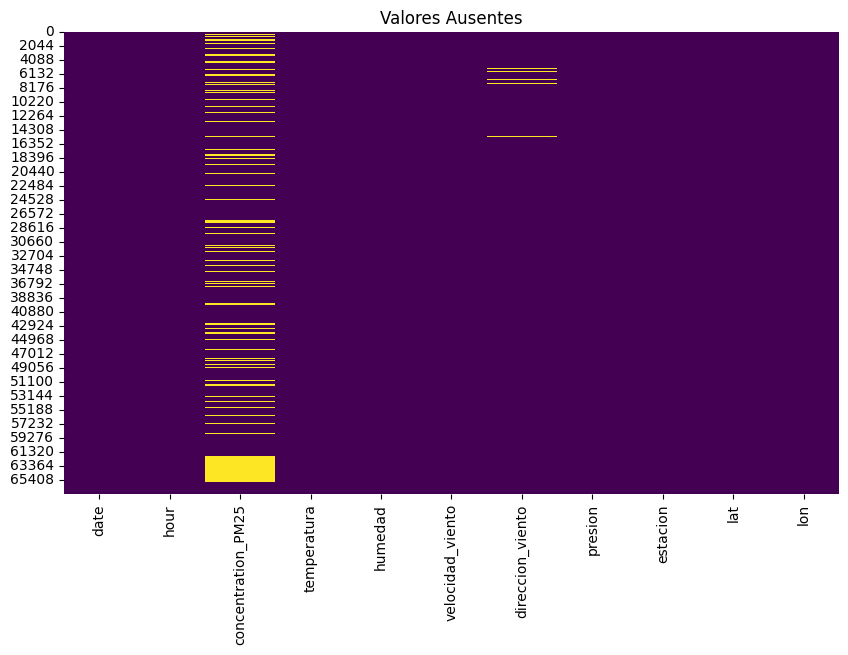

In [43]:
# Visualización de valores nulos con mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Ausentes')
plt.show()

Podemos observar que todas las variables de interes tienen valores ausentes, dejando de lado las columnas: *date, hour, estacion, latitud y longitud*.
Podemos ver que la variable concentraciones_PM25 posee el 20% de valores faltantes, mientras que el resto esta por debajo del 1.2% de faltantes, siendo direccion_viento la que sigue en cuanto a datos faltantes
Segun lo visto en clase hay varias alternativas para trabajar con valores ausentes:

*   *Eliminar las filas con valores ausentes:* este podria ser el caso de la variable "Embarked" ya que son solo 2 valores ausentes
*   *Imputación de valores*: Esta alternativa podriamos utilizar para la columna "age" colocando la media de las edades
*   *Eliminar columnas con muchos valores ausentes:* Si una columna tiene una gran cantidad de valores ausentes y no es crucial para tu análisis, podrías considerar eliminarla. Este seria el caso a mi parecer de la columna "Cabin". Esta variable podria ser de interes si queremos saber cuantas personas hay por cabin, pero al tener tantos valores vacio, creeria que tampoco vamos a poder saberlo
*   *Modelo de imputación avanzado*
*  *Análisis por grupos*
*   *Crear una categoría "Desconocido"*

#Trabajando con valores ausentes

Solo para el fin de la practica vamos a mostrar todas las alternativas para trabajar con valores ausentes. Ya que personalmente creo que no seria del todo correcto utilizar y rellar con valores medios este dataset

DataFrame después del tratamiento:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 67437 entries, 0 to 67450
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                67437 non-null  object 
 1   hour                67437 non-null  object 
 2   concentration_PM25  67437 non-null  float64
 3   temperatura         67437 non-null  float64
 4   humedad             67437 non-null  float64
 5   velocidad_viento    67437 non-null  float64
 6   presion             67437 non-null  float64
 7   estacion            67437 non-null  object 
 8   lat                 67437 non-null  float64
 9   lon                 67437 non-null  float64
dtypes: float64(7), object(3)
memory usage: 5.7+ MB


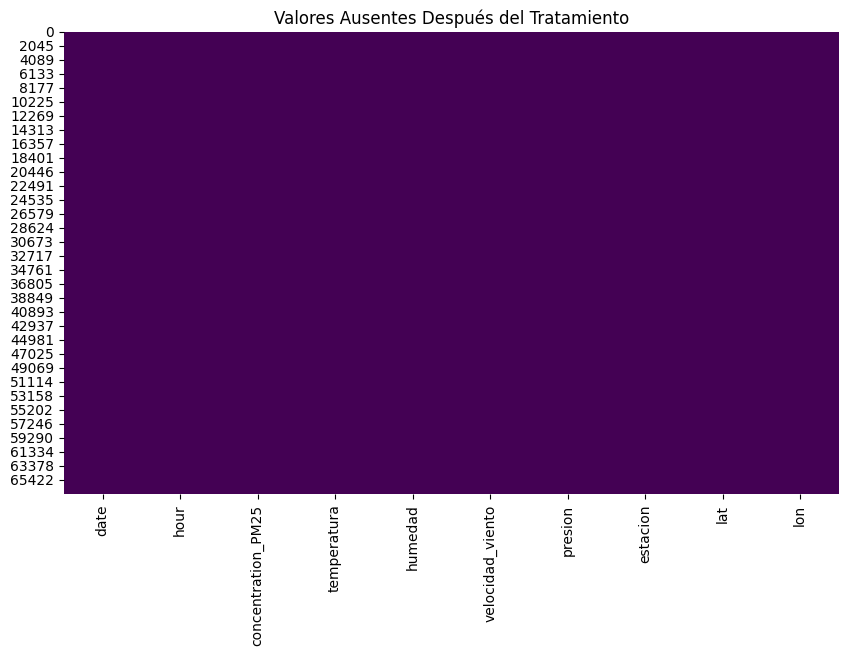

In [4]:
# Solo para el fin de la practica vamos a mostrar todas las alternativas para trabajar con valores ausentes.
# Rellenar valores nulos en 'Age' con la media. Es correcto esto? o tenemos que eliminar la columna debido a la faltante de datos

data['temperatura'].fillna(data['temperatura'].mean(), inplace=True)
data['humedad'].fillna(data['humedad'].mean(), inplace=True)
data['velocidad_viento'].fillna(data['velocidad_viento'].mean(), inplace=True)
data['concentration_PM25'].fillna(data['concentration_PM25'].mean(), inplace=True)# si bien esta variable tiene muchos valors ausente, la dejamos para ver sus datos
#Eliminamos esta columna debido a la cantidad de datos faltantes
data.drop(columns = ["direccion_viento"], inplace=True)
#Eliminamos filas con valores ausentes debido a la cantidad de datos faltantes
data.dropna(subset=['presion'], inplace=True)
# Mostrar DataFrame después del tratamiento
print("DataFrame después del tratamiento:")
data.info()
# Visualización de valores nulos con mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Ausentes Después del Tratamiento')
plt.show()

Ahora podemos ver que no existen valores nulos en ninguna de las variables. El nuevo dataset tiene un length de 67437 (valores horarios) mientras que en un principio nuestro dataset tenia un length de 67451 datos. Solo eliminamos dos filas provenientes de la variable *presion* y eliminamos la columna *direccion_viento*. Mientras que las variables restantes, fueron completadas con valores medios.

#B. Valores atipicos
A este analisis solo lo podemos llevar a cabo siempre y cuando la variable sea numerica.


## 01. concentration_PM25

Limite inferior -5.95 y Limite superior 26.37
El minimo es 0.0 mientras que el maximo es 1359.81


<Axes: title={'center': 'Boxplot variable concentration_PM25'}, xlabel=' ', ylabel='concentration_PM25'>

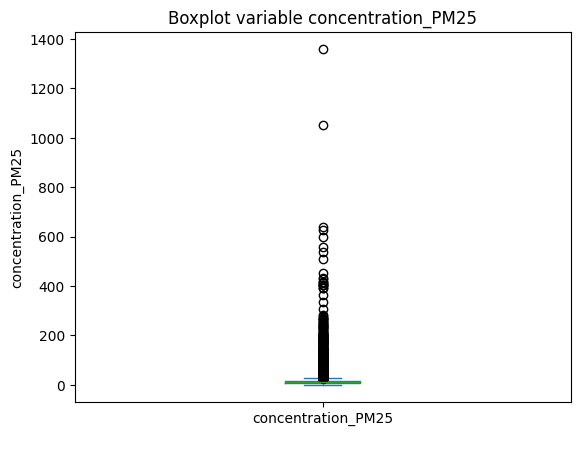

In [49]:
 #Valores atipicos a traves del rango intercuartil.
# A partir del primer y tercer cuartil definimos los limites de los valores atipicos, por debajo y por encima de estos limites
# Rango intercuartil
irq_concentration_PM25 = data['concentration_PM25'].quantile(0.75) - data['concentration_PM25'].quantile(0.25)
#definimos limites
lower_bound_concentration_PM25 = data['concentration_PM25'].quantile(0.25) - 1.5 * irq_concentration_PM25
upper_bound_concentration_PM25 = data['concentration_PM25'].quantile(0.75) + 1.5 * irq_concentration_PM25

#Identificamos valores atipicos de "concentration_PM25"
outliers_concentration_PM25 = data[(data['concentration_PM25']<lower_bound_concentration_PM25) | (data['concentration_PM25']> upper_bound_concentration_PM25)]

#Print valores atipicos
print(f'Limite inferior {round(lower_bound_concentration_PM25,2)} y Limite superior {upper_bound_concentration_PM25}')
print(f"El minimo es {data['concentration_PM25'].min()} mientras que el maximo es {data['concentration_PM25'].max()}")
# Datos atipicos. Una forma de verlos es a traves de boxplots
data['concentration_PM25'].plot.box(title="Boxplot variable concentration_PM25",xlabel=" ",ylabel="concentration_PM25")


Vemos que existen muchos outliers, de una forma muy pronunciada, como veniamos en la serie temporal. Pero los outliers siempre son a partir del limite superior, no existen outliers del limite inferior. El boxplot es muy pequeño debindo a que son significativos los outliers

#02.Temperatura

Limite inferior 0.3 y Limite superior 35.5
El minimo es 1.3 mientras que el maximo es 38.6


<Axes: title={'center': 'Boxplot variable temperatura'}, xlabel=' ', ylabel='temperatura'>

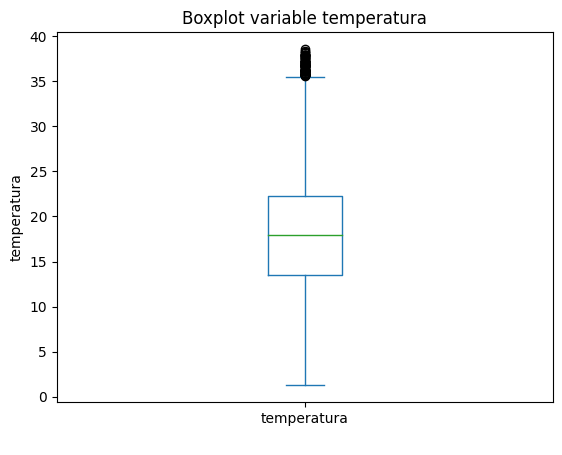

In [50]:
 #Valores atipicos a traves del rango intercuartil.
# A partir del primer y tercer cuartil definimos los limites de los valores atipicos, por debajo y por encima de estos limites
# Rango intercuartil
irq_temperatura = data['temperatura'].quantile(0.75) - data['temperatura'].quantile(0.25)
#definimos limites
lower_bound_temperatura= data['temperatura'].quantile(0.25) - 1.5 * irq_temperatura
upper_bound_temperatura = data['temperatura'].quantile(0.75) + 1.5 * irq_temperatura

#Identificamos valores atipicos de "concentration_PM2temperatura5"
outliers_temperatura = data[(data['temperatura']<lower_bound_temperatura) | (data['temperatura']> upper_bound_temperatura)]

#Print valores atipicos
print(f'Limite inferior {round(lower_bound_temperatura,2)} y Limite superior {upper_bound_temperatura}')
print(f"El minimo es {data['temperatura'].min()} mientras que el maximo es {data['temperatura'].max()}")
# Datos atipicos. Una forma de verlos es a traves de boxplots
data['temperatura'].plot.box(title="Boxplot variable temperatura",xlabel=" ",ylabel="temperatura")


Al igual que la variable anterior, existen outliers a partir de limite superior, a partir del 35.5. Si bien parece que son varios los puntos (no sabemos cuantos) los mismos estan concentrados y no superan los 38.6°C. Pero como veiamos antes la amplitud termica es amplia

# 03. Humedad

Limite inferior 37.0 y Limite superior 117.0
El minimo es 18.0 mientras que el maximo es 100.0


<Axes: title={'center': 'Boxplot variable humedad'}, xlabel=' ', ylabel='humedad'>

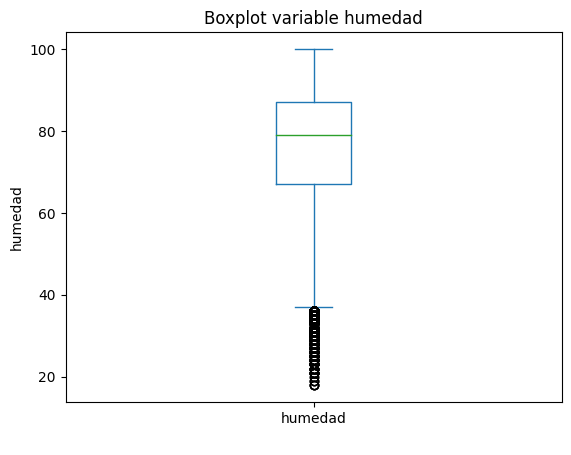

In [51]:
#Valores atipicos a traves del rango intercuartil.
# A partir del primer y tercer cuartil definimos los limites de los valores atipicos, por debajo y por encima de estos limites
# Rango intercuartil
irq_humedad = data['humedad'].quantile(0.75) - data['humedad'].quantile(0.25)
#definimos limites
lower_bound_humedad= data['humedad'].quantile(0.25) - 1.5 * irq_humedad
upper_bound_humedad = data['humedad'].quantile(0.75) + 1.5 * irq_humedad

#Identificamos valores atipicos de "humedad"
outliers_humedad = data[(data['humedad']<lower_bound_humedad) | (data['humedad']> upper_bound_humedad)]

#Print valores atipicos
print(f'Limite inferior {round(lower_bound_humedad,2)} y Limite superior {upper_bound_humedad}')
print(f"El minimo es {data['humedad'].min()} mientras que el maximo es {data['humedad'].max()}")
# Datos atipicos. Una forma de verlos es a traves de boxplots
data['humedad'].plot.box(title="Boxplot variable humedad",xlabel=" ",ylabel="humedad")

A diferencias de las variables anteriores, los outliers se presentan por debajo del limite inferior.

 # 04. Velocidad viento

Limite inferior -6.55 y Limite superior 32.25
El minimo es 0.0 mientras que el maximo es 46.7


<Axes: title={'center': 'Boxplot variable velocidad viento'}, xlabel=' ', ylabel='velocidad_viento'>

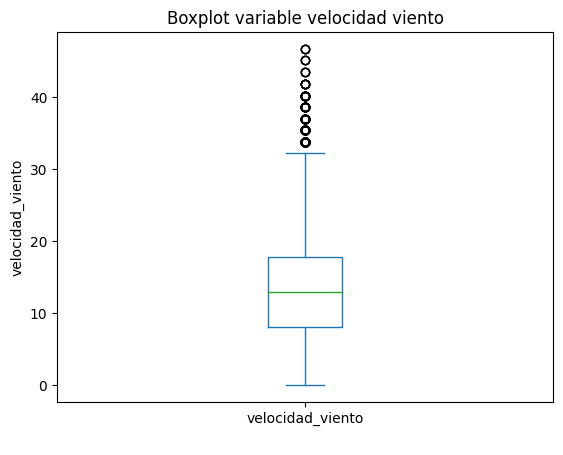

In [52]:
#Valores atipicos a traves del rango intercuartil.
# A partir del primer y tercer cuartil definimos los limites de los valores atipicos, por debajo y por encima de estos limites
# Rango intercuartil
irq_velocidad_viento = data['velocidad_viento'].quantile(0.75) - data['velocidad_viento'].quantile(0.25)
#definimos limites
lower_bound_velocidad_viento= data['velocidad_viento'].quantile(0.25) - 1.5 * irq_velocidad_viento
upper_bound_velocidad_viento = data['velocidad_viento'].quantile(0.75) + 1.5 * irq_velocidad_viento

#Identificamos valores atipicos de "velocidad_viento"
outliers_velocidad_viento = data[(data['velocidad_viento']<lower_bound_velocidad_viento) | (data['velocidad_viento']> upper_bound_velocidad_viento)]

#Print valores atipicos
print(f'Limite inferior {round(lower_bound_velocidad_viento,2)} y Limite superior {upper_bound_velocidad_viento}')
print(f"El minimo es {data['velocidad_viento'].min()} mientras que el maximo es {data['velocidad_viento'].max()}")
# Datos atipicos. Una forma de verlos es a traves de boxplots
data['velocidad_viento'].plot.box(title="Boxplot variable velocidad viento",xlabel=" ",ylabel="velocidad_viento")

Vemos que existen outlier en el limite superior,  mientras que en el limite inferior no se observan valores atipicos

#05. Presion

Limite inferior 996.45 y Limite superior 1031.25
El minimo es 989.3 mientras que el maximo es 1036.4


<Axes: title={'center': 'Boxplot variable velocidad presion'}, xlabel=' ', ylabel='presion'>

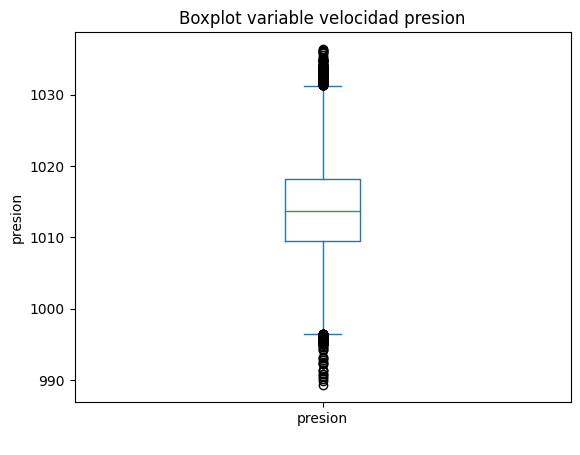

In [53]:
#Valores atipicos a traves del rango intercuartil.
# A partir del primer y tercer cuartil definimos los limites de los valores atipicos, por debajo y por encima de estos limites
# Rango intercuartil
irq_velocidad_presion = data['presion'].quantile(0.75) - data['presion'].quantile(0.25)
#definimos limites
lower_bound_velocidad_presion= data['presion'].quantile(0.25) - 1.5 * irq_velocidad_presion
upper_bound_velocidad_presion = data['presion'].quantile(0.75) + 1.5 * irq_velocidad_presion

#Identificamos valores atipicos de "presion"
outliers_velocidad_presion= data[(data['presion']<lower_bound_velocidad_presion) | (data['presion']> upper_bound_velocidad_presion)]

#Print valores atipicos
print(f'Limite inferior {round(lower_bound_velocidad_presion,2)} y Limite superior {upper_bound_velocidad_presion}')
print(f"El minimo es {data['presion'].min()} mientras que el maximo es {data['presion'].max()}")
# Datos atipicos. Una forma de verlos es a traves de boxplots
data['presion'].plot.box(title="Boxplot variable velocidad presion",xlabel=" ",ylabel="presion")

En cambio para esta variable se obtuvieron valores atipicos tanto para el limite inferior como el superior. Sin embargo, recordemos que esta variable segun las estadisticas basicas estan bastante concentradas, y no se observaban una alta variabilidad. Por lo que estadisticamente, si hay outliers, pero en la realidad no deberian ser considerarse como tal


#6- Realizar analisis univariados

*   Grafico de frecuencia
*   Grafico de torta
*   Histograma

In [54]:
data.columns

Index(['date', 'hour', 'concentration_PM25', 'temperatura', 'humedad',
       'velocidad_viento', 'presion', 'estacion', 'lat', 'lon'],
      dtype='object')

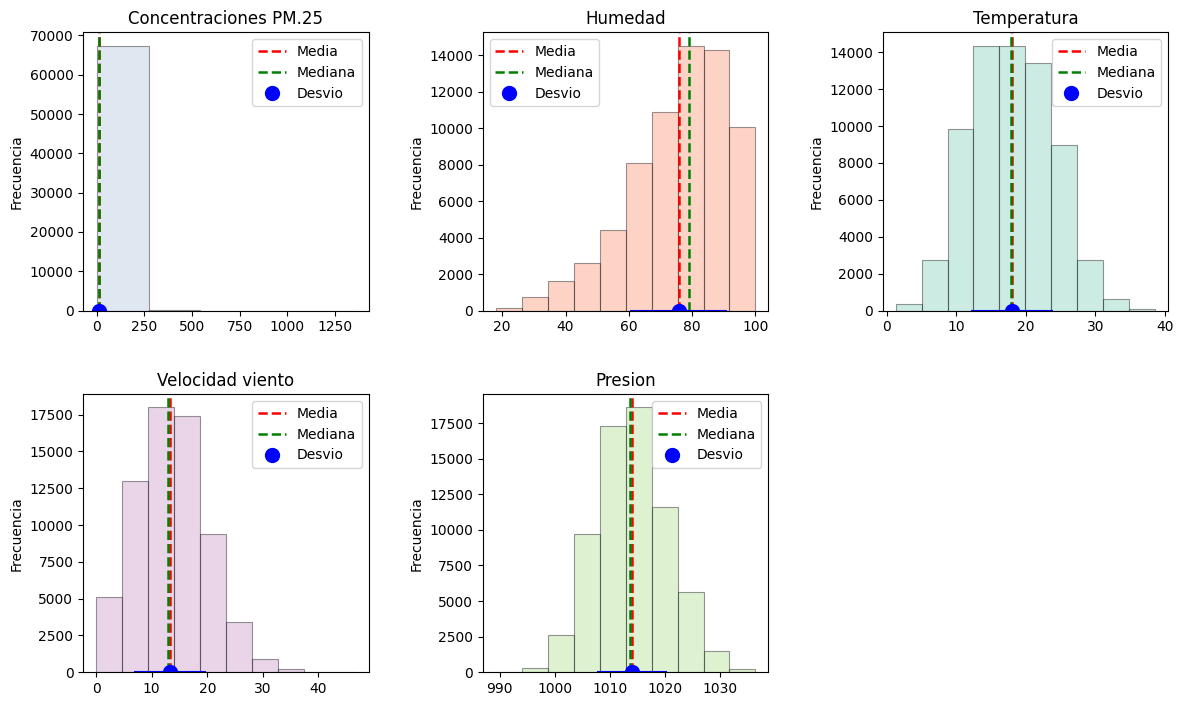

In [19]:
# Datos para los plots
#medias
mean_concentration_PM25 = np.mean(data["concentration_PM25"])
mean_temperatura = np.mean(data["temperatura"])
mean_humedad = np.mean(data["humedad"])
mean_velocidad_viento = np.mean(data["velocidad_viento"])
mean_presion= np.mean(data["presion"])
#error
sd_concentration_PM25 = np.std(data["concentration_PM25"])
sd_temperatura = np.std(data["temperatura"])
sd_humedad = np.std(data["humedad"])
sd_velocidad_viento = np.std(data["velocidad_viento"])
sd_presion= np.std(data["presion"])

#mediana
median_concentration_PM25 = np.median(data["concentration_PM25"])
median_temperatura = np.median(data["temperatura"])
median_humedad = np.median(data["humedad"])
median_velocidad_viento = np.median(data["velocidad_viento"])
median_presion= np.median(data["presion"])





# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))
ax[0][0].hist(data["concentration_PM25"],bins=5,color = "lightsteelblue",alpha=0.4, edgecolor = 'black',  linewidth=0.8)
ax[0][0].axvline(mean_concentration_PM25,  color='red', linestyle='dashed',linewidth= 1.8, label= 'Media')
ax[0][0].axvline(median_concentration_PM25,  color='green', linestyle='dashed',linewidth= 1.8, label= 'Mediana')
ax[0][0].errorbar(mean_concentration_PM25,1,xerr=sd_concentration_PM25,color='blue',fmt='o',markersize=10,label='Desvio')

ax[0][1].hist(data["humedad"],color = "#fc9272",alpha=0.4, edgecolor = 'black',  linewidth=0.8)
ax[0][1].axvline(mean_humedad,  color='red', linestyle='dashed',linewidth= 1.8, label= 'Media')
ax[0][1].axvline(median_humedad,  color='green', linestyle='dashed',linewidth= 1.8, label= 'Mediana')
ax[0][1].errorbar(mean_humedad,1,xerr=sd_humedad,color='blue',fmt='o',markersize=10,label='Desvio')

ax[0][2].hist(data["temperatura"],color = "#7fcdbb",alpha=0.4, edgecolor = 'black',  linewidth=0.8)
ax[0][2].axvline(mean_temperatura,  color='red', linestyle='dashed',linewidth= 1.8, label= 'Media')
ax[0][2].axvline(median_temperatura,  color='green', linestyle='dashed',linewidth= 1.8, label= 'Mediana')
ax[0][2].errorbar(mean_temperatura,1,xerr=sd_temperatura,color='blue',fmt='o',markersize=10,label='Desvio')

ax[1][0].hist(data["velocidad_viento"],color = "#c994c7",alpha=0.4, edgecolor = 'black',  linewidth=0.8)
ax[1][0].axvline(mean_velocidad_viento,  color='red', linestyle='dashed',linewidth= 1.8, label= 'Media')
ax[1][0].axvline(median_velocidad_viento,  color='green', linestyle='dashed',linewidth= 1.8, label= 'Mediana')
ax[1][0].errorbar(mean_velocidad_viento,1,xerr=sd_velocidad_viento,color='blue',fmt='o',markersize=10,label='Desvio')

ax[1][1].hist(data["presion"],color = "#addd8e",alpha=0.4, edgecolor = 'black',  linewidth=0.8)
ax[1][1].axvline(mean_presion,  color='red', linestyle='dashed',linewidth= 1.8, label= 'Media')
ax[1][1].axvline(median_presion,  color='green', linestyle='dashed',linewidth= 1.8, label= 'Mediana')
ax[1][1].errorbar(mean_presion,1,xerr=sd_presion,color='blue',fmt='o',markersize=10,label='Desvio')


# Titulo
ax[0][0].set_title('Concentraciones PM.25')
ax[0][1].set_title('Humedad')
ax[0][2].set_title('Temperatura')
ax[1][0].set_title('Velocidad viento')
ax[1][1].set_title('Presion')
# EJES
ax[0][0].set_ylabel('Frecuencia')
ax[0][1].set_ylabel('Frecuencia')
ax[0][2].set_ylabel('Frecuencia')
ax[1][0].set_ylabel('Frecuencia')
ax[1][1].set_ylabel('Frecuencia')


# Legenda
ax[0][0].legend()
ax[0][1].legend()
ax[0][2].legend()
ax[1][0].legend()
ax[1][1].legend()

# Separacion
plt.subplots_adjust(left=0.125,
            bottom=0.1,
            right=0.9,
            top=0.9,
            wspace=0.4,
            hspace=0.3)
ax[1][2].set_visible(False)
plt.show()

# Figura de correlacion

<ipython-input-14-8d34c1a82aff>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


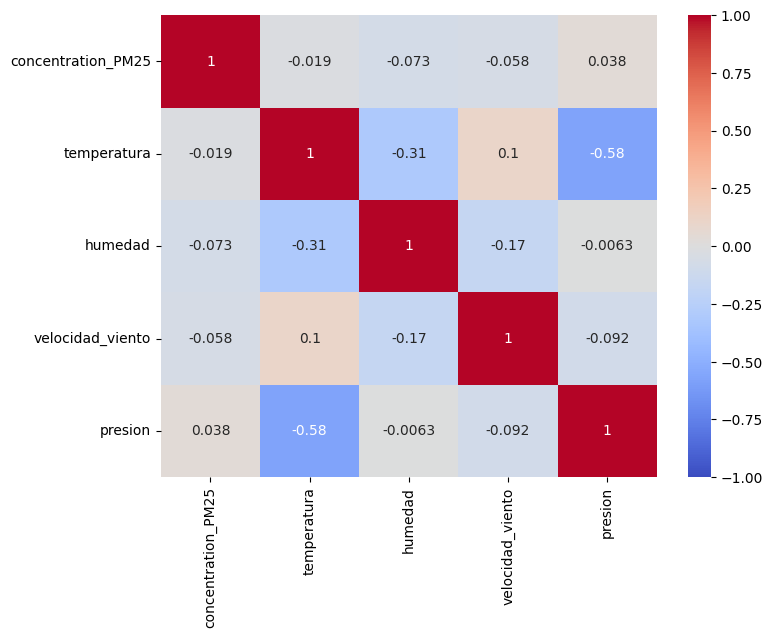

In [14]:
#Plot de correlacion cpn seaborn
# Previa a la correlacion eliminamos la columna de ID que no sera necesaria
data.drop(['lat','lon'], axis=1, inplace=True)
corr = data.corr()
fig,ax=plt.subplots(1,1,figsize=(8,6))
ax = sns.heatmap(corr,  vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')